In [40]:
# Imports
import os
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [41]:
# Read 'hourly' csv files
csv_files = os.listdir("data")
hourly_csv_files = [f for f in csv_files if '_1h.csv' in f]
hourlies = []
for i in range(len(hourly_csv_files)):
    hourlies.append(pd.read_csv('data/' + hourly_csv_files[i], header=1))

In [42]:
# Use the 'close' values and prepare the dict for the dataframe
time_window = 'train' # Can be train, test, both
# Train - test seperation made considering the date specifications from the slides
if time_window == 'train':
    closes = {}
    for i in range(len(hourlies)):
        temp = hourlies[i][hourlies[i]['date'] >= '2021-10-15 00:00:00']
        temp = temp[temp['date'] < '2021-12-01 00:00:00']
        closes[temp['symbol'].values[0]] = np.flip(temp['close'].values)
elif time_window == 'test':
    closes = {}
    for i in range(len(hourlies)):
        temp = hourlies[i][hourlies[i]['date'] >= '2021-12-01 00:00:00']
        temp = temp[temp['date'] < '2022-01-16 00:00:00']
        closes[temp['symbol'].values[0]] = np.flip(temp['close'].values)
elif time_window == 'both':
    closes = {}
    for i in range(len(hourlies)):
        temp = hourlies[i][hourlies[i]['date'] >= '2021-10-15 00:00:00']
        temp = temp[temp['date'] < '2022-01-16 00:00:00']
        closes[temp['symbol'].values[0]] = np.flip(temp['close'].values)
closes

{'TRX/USDT': array([0.09599, 0.09601, 0.09757, ..., 0.09686, 0.09713, 0.09652]),
 'ADA/USDT': array([2.152, 2.151, 2.178, ..., 1.565, 1.561, 1.554]),
 'ETH/USDT': array([3766.  , 3748.9 , 3830.52, ..., 4625.8 , 4652.79, 4630.26]),
 'ZEC/USDT': array([120.8, 120. , 121.9, ..., 221.6, 223.1, 220.2]),
 'XLM/USDT': array([0.3615, 0.3612, 0.3682, ..., 0.3386, 0.3392, 0.3358]),
 'XMR/USDT': array([263.3, 262.8, 267.7, ..., 238.9, 240.3, 238. ]),
 'BNB/USDT': array([466.7, 463.5, 474.2, ..., 620. , 626.1, 622.5]),
 'BTT/USDT': array([0.003692, 0.003686, 0.003751, ..., 0.003165, 0.003174, 0.00316 ]),
 'LTC/USDT': array([178.6, 178. , 183.6, ..., 209.1, 209.4, 207.8]),
 'XRP/USDT': array([1.1138, 1.1145, 1.1355, ..., 0.9995, 1.0047, 0.9983]),
 'QTUM/USDT': array([12.877, 12.952, 13.233, ..., 16.703, 16.395, 16.068]),
 'DASH/USDT': array([184.3, 183.8, 187.8, ..., 179.8, 181. , 180. ]),
 'LINK/USDT': array([26.28, 26.19, 26.74, ..., 25.68, 25.66, 25.31]),
 'EOS/USDT': array([4.551, 4.543, 4.638,

In [43]:
# Create the dataframe
df = pd.DataFrame(closes)
df = df.reindex(sorted(df.columns), axis=1)
df

,ADA/USDT,BNB/USDT,BTC/USDT,BTT/USDT,DASH/USDT,DOGE/USDT,EOS/USDT,ETC/USDT,ETH/USDT,LINK/USDT,LTC/USDT,NEO/USDT,QTUM/USDT,TRX/USDT,XLM/USDT,XMR/USDT,XRP/USDT,ZEC/USDT
0,2.152,466.7,57050.36,0.003692,184.3,0.2296,4.551,53.68,3766.00,26.28,178.6,44.24,12.877,0.09599,0.3615,263.3,1.1138,120.8
1,2.151,463.5,57258.62,0.003686,183.8,0.2292,4.543,53.50,3748.90,26.19,178.0,44.14,12.952,0.09601,0.3612,262.8,1.1145,120.0
2,2.178,474.2,59086.91,0.003751,187.8,0.2335,4.638,54.89,3830.52,26.74,183.6,45.15,13.233,0.09757,0.3682,267.7,1.1355,121.9
3,2.175,465.6,59431.71,0.003746,188.0,0.2334,4.647,55.63,3820.92,26.83,184.5,45.21,13.270,0.09772,0.3695,268.9,1.1356,122.3
4,2.197,466.1,59597.64,0.003750,189.1,0.2324,4.691,55.86,3822.54,26.76,185.2,45.37,13.287,0.09771,0.3678,269.5,1.1358,122.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,1.572,623.3,57629.99,0.003174,181.6,0.2166,4.038,48.81,4663.23,25.99,211.2,38.05,16.507,0.09762,0.3420,245.4,1.0067,224.1
1124,1.563,622.2,57400.41,0.003176,180.7,0.2157,4.036,48.50,4644.04,25.91,209.8,37.85,16.476,0.09731,0.3409,242.9,1.0041,224.1
1125,1.565,620.0,57097.79,0.003165,179.8,0.2155,4.016,48.65,4625.80,25.68,209.1,37.70,16.703,0.09686,0.3386,238.9,0.9995,221.6
1126,1.561,626.1,57267.91,0.003174,181.0,0.2164,4.038,48.79,4652.79,25.66,209.4,37.77,16.395,0.09713,0.3392,240.3,1.0047,223.1


In [44]:
# Normalize
version = 1

# Version-0: No normalization
# The first version I tried
if version == 0:
    df_normalized = df.copy() # Deep copy

# Version-1: Normalize by dividing each element of the array by the first element of the array
# The second version I tried after I realized I need to normalize
elif version == 1:
    df_normalized = df.copy()
    for c in df_normalized.columns.values:
        df_normalized[c] = df_normalized[c] / df_normalized[c][0]

# Version-2: Normalize by dividing each element of the array by its predecessor: (n)th element is divided by (n-1)th element for each (n)
# The other version I tried for normalization
elif version == 2:
    df_normalized = df.copy()
    for c in df_normalized.columns.values:
        new_col = np.zeros_like(df_normalized[c].values)
        new_col[0] = 1.0
        new_col[1:] = (df_normalized[c].values[1:] / df_normalized[c].values[:-1])
        df_normalized[c] = new_col

df_normalized

,ADA/USDT,BNB/USDT,BTC/USDT,BTT/USDT,DASH/USDT,DOGE/USDT,EOS/USDT,ETC/USDT,ETH/USDT,LINK/USDT,LTC/USDT,NEO/USDT,QTUM/USDT,TRX/USDT,XLM/USDT,XMR/USDT,XRP/USDT,ZEC/USDT
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999535,0.993143,1.003650,0.998375,0.997287,0.998258,0.998242,0.996647,0.995459,0.996575,0.996641,0.997740,1.005824,1.000208,0.999170,0.998101,1.000628,0.993377
2,1.012082,1.016070,1.035697,1.015980,1.018991,1.016986,1.019117,1.022541,1.017132,1.017504,1.027996,1.020570,1.027646,1.016460,1.018534,1.016711,1.019483,1.009106
3,1.010688,0.997643,1.041741,1.014626,1.020076,1.016551,1.021094,1.036326,1.014583,1.020928,1.033035,1.021926,1.030520,1.018023,1.022130,1.021269,1.019573,1.012417
4,1.020911,0.998714,1.044650,1.015710,1.026044,1.012195,1.030762,1.040611,1.015013,1.018265,1.036954,1.025542,1.031840,1.017919,1.017427,1.023547,1.019752,1.017384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,0.730483,1.335547,1.010160,0.859697,0.985350,0.943380,0.887278,0.909277,1.238245,0.988965,1.182531,0.860081,1.281898,1.016981,0.946058,0.932017,0.903843,1.855132
1124,0.726301,1.333190,1.006136,0.860238,0.980467,0.939460,0.886838,0.903502,1.233149,0.985921,1.174692,0.855561,1.279491,1.013751,0.943015,0.922522,0.901508,1.855132
1125,0.727230,1.328477,1.000831,0.857259,0.975583,0.938589,0.882443,0.906297,1.228306,0.977169,1.170773,0.852170,1.297119,1.009063,0.936653,0.907330,0.897378,1.834437
1126,0.725372,1.341547,1.003813,0.859697,0.982094,0.942509,0.887278,0.908905,1.235473,0.976408,1.172452,0.853752,1.273200,1.011876,0.938313,0.912647,0.902047,1.846854


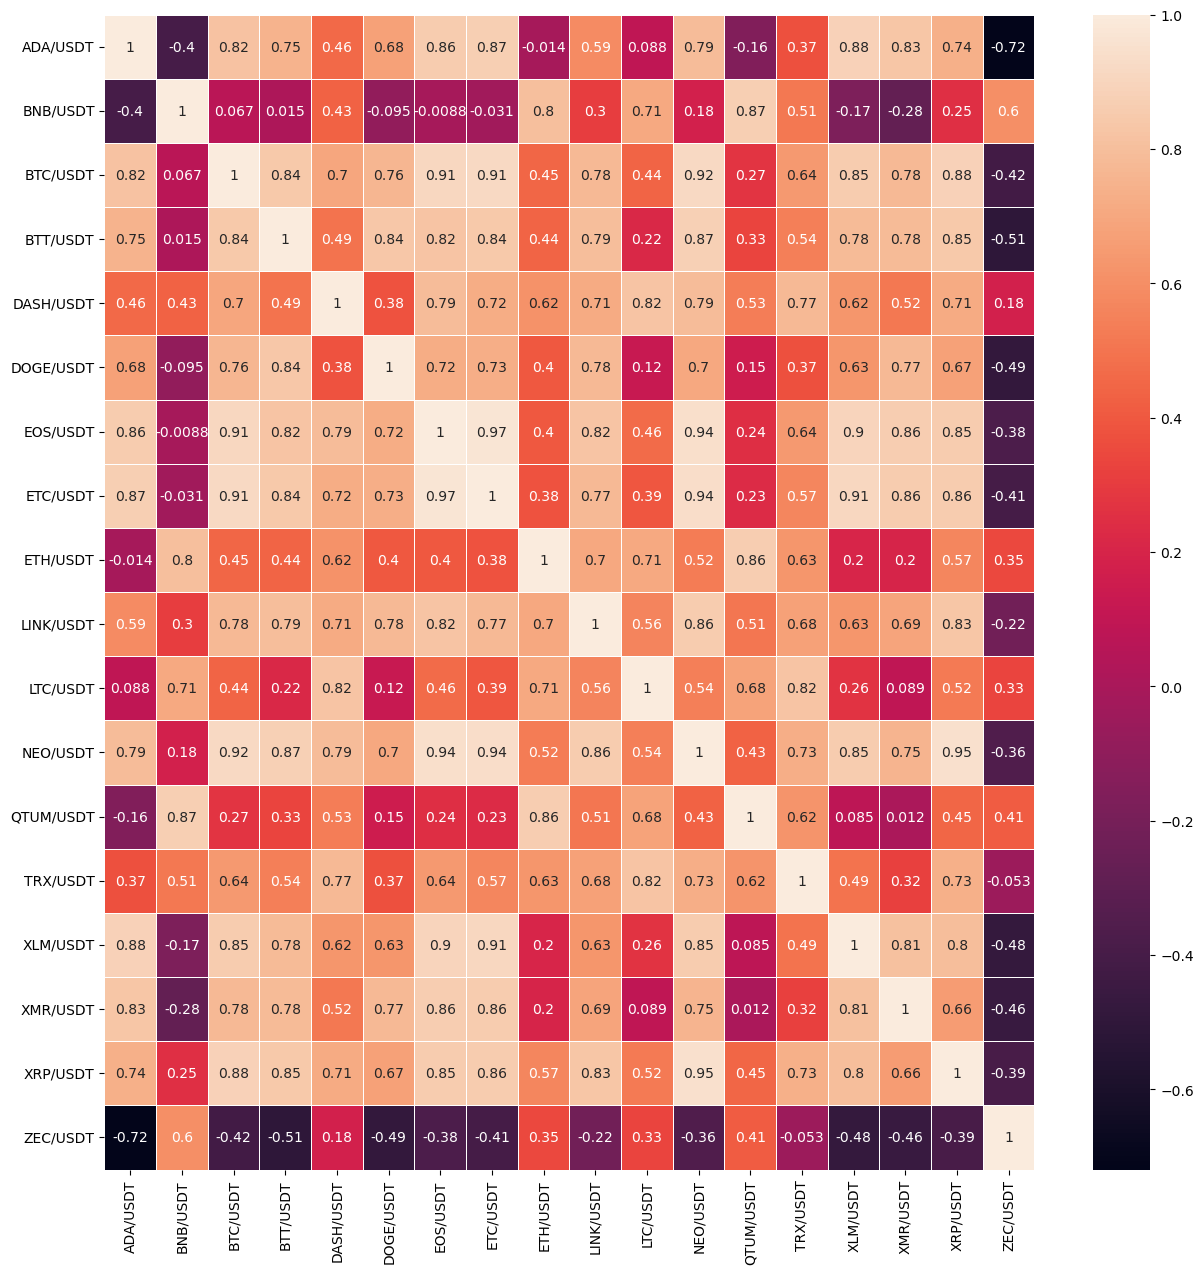

In [45]:
### KORELASYON
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
sn.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

Spread Variance calculated after normalizing the data with normalization Version-1


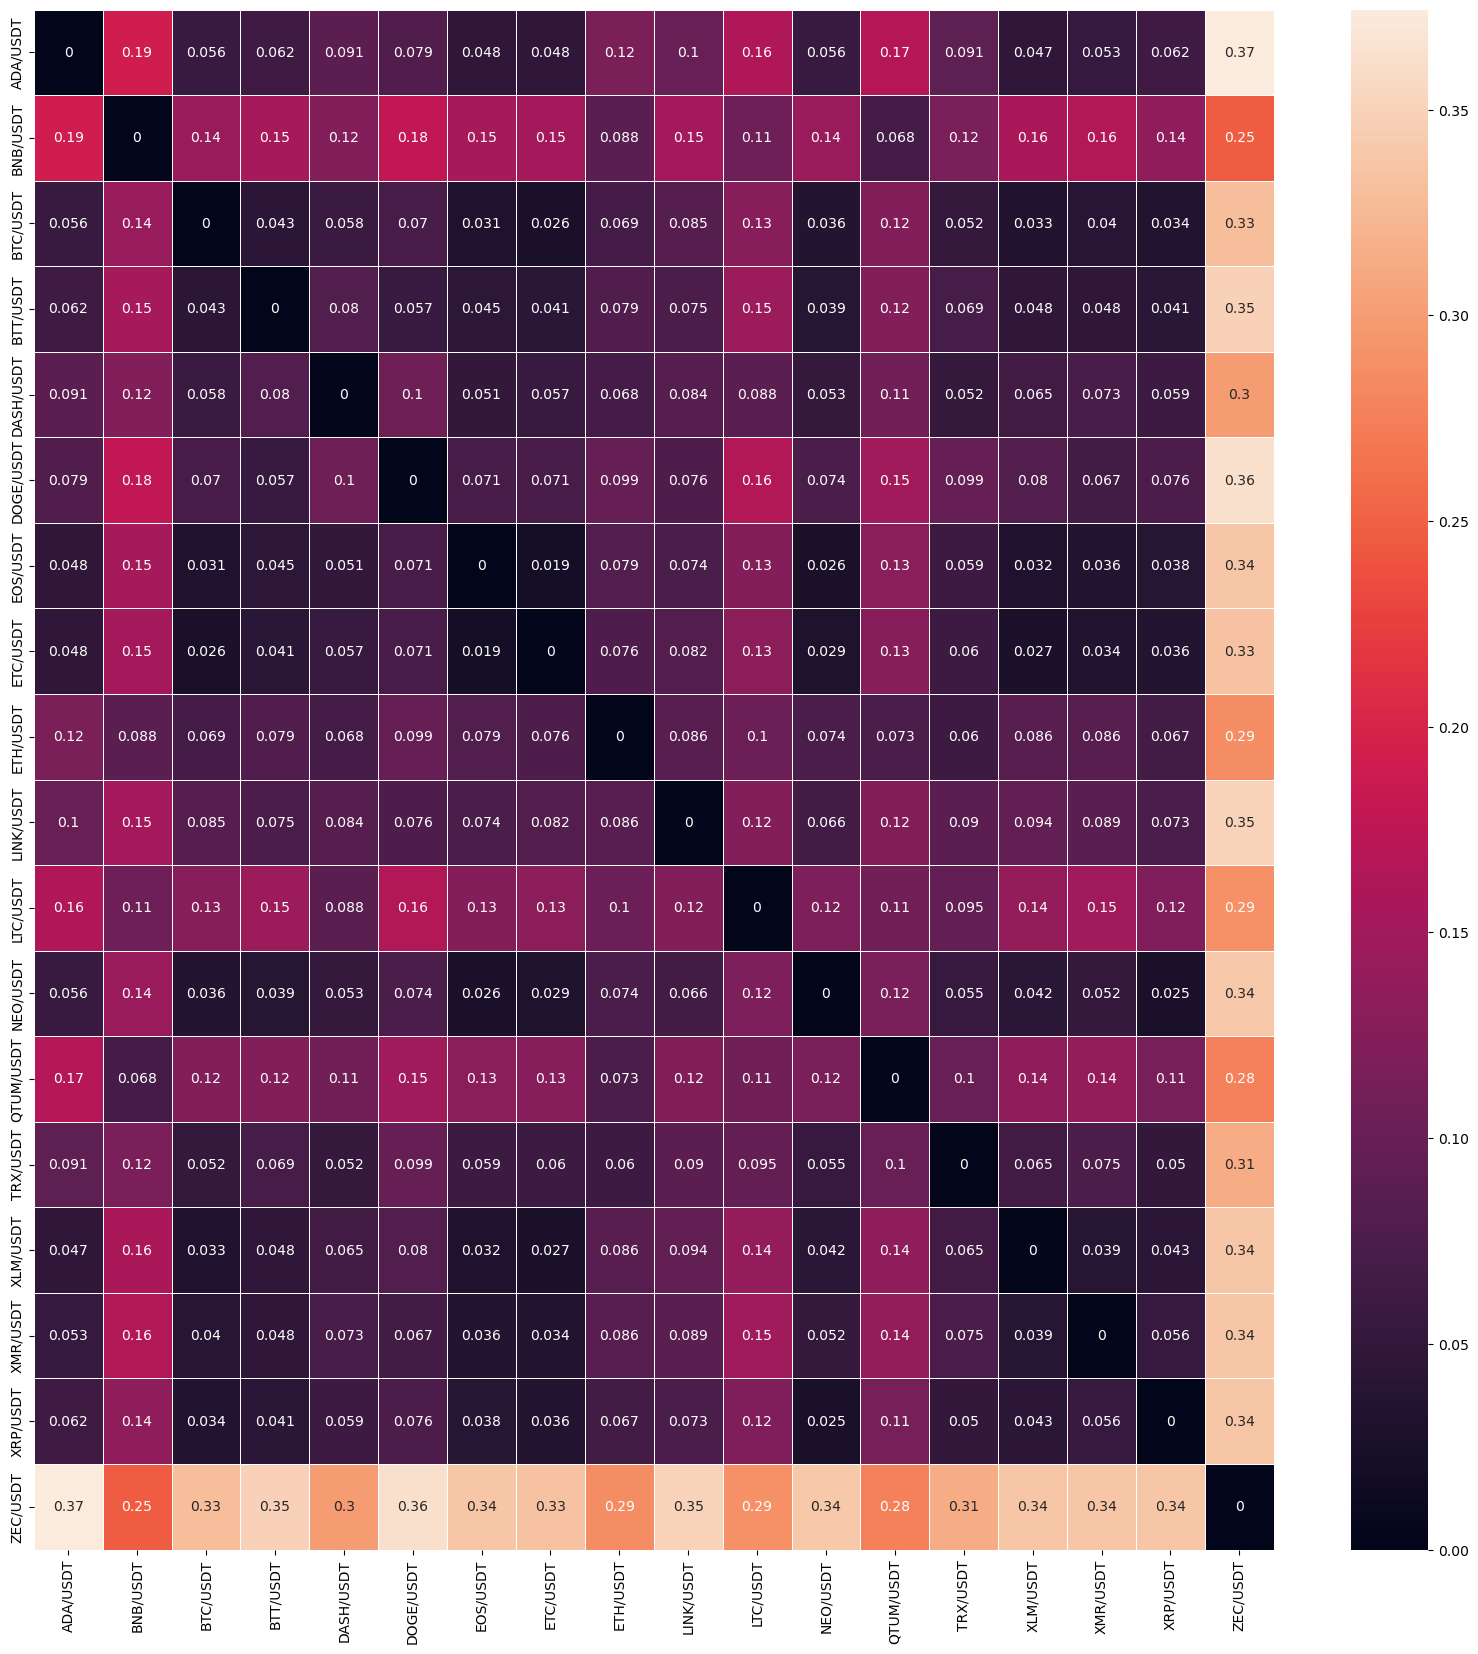

In [46]:
### SPREAD VARYANSI
print('Spread Variance calculated after normalizing the data with normalization Version-', version, sep='')
spread_var_matrix = pd.DataFrame().reindex_like(corr_matrix)
for i in df_normalized.columns.values:
    for j in df_normalized.columns.values:
        spread = df_normalized[i].values - df_normalized[j].values
        spread_var = np.std(spread)
        spread_var_matrix.loc[i][j] = spread_var
fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(spread_var_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

In [47]:
### CROSSOVER SAYISI & SON CROSSOVER
print('Number of crossovers and the index of the last crossover is found by using the sign changes of the spreads calculated after normalizing the data with normalization Version-', version, sep='')
num_crossovers_matrix = pd.DataFrame().reindex_like(corr_matrix)
last_crossover_matrix = pd.DataFrame().reindex_like(corr_matrix)

for i in df_normalized.columns.values:
    for j in df_normalized.columns.values:
        spread = df_normalized[i].values - df_normalized[j].values
        cross = 0
        last_cross_index = 0

        # A sing change in the spread means a crossover happened.
        for k in range(1, spread.shape[0]):
            if spread[k-1]*spread[k] < 0: # Therefore, if spread[k-1] * spread[k] < 0 then a crossover happened.
                cross += 1
                last_cross_index = k
        
        num_crossovers_matrix.loc[i][j] = cross
        last_crossover_matrix.loc[i][j] = last_cross_index

Number of crossovers and the index of the last crossover is found by using the sign changes of the spreads calculated after normalizing the data with normalization Version-1


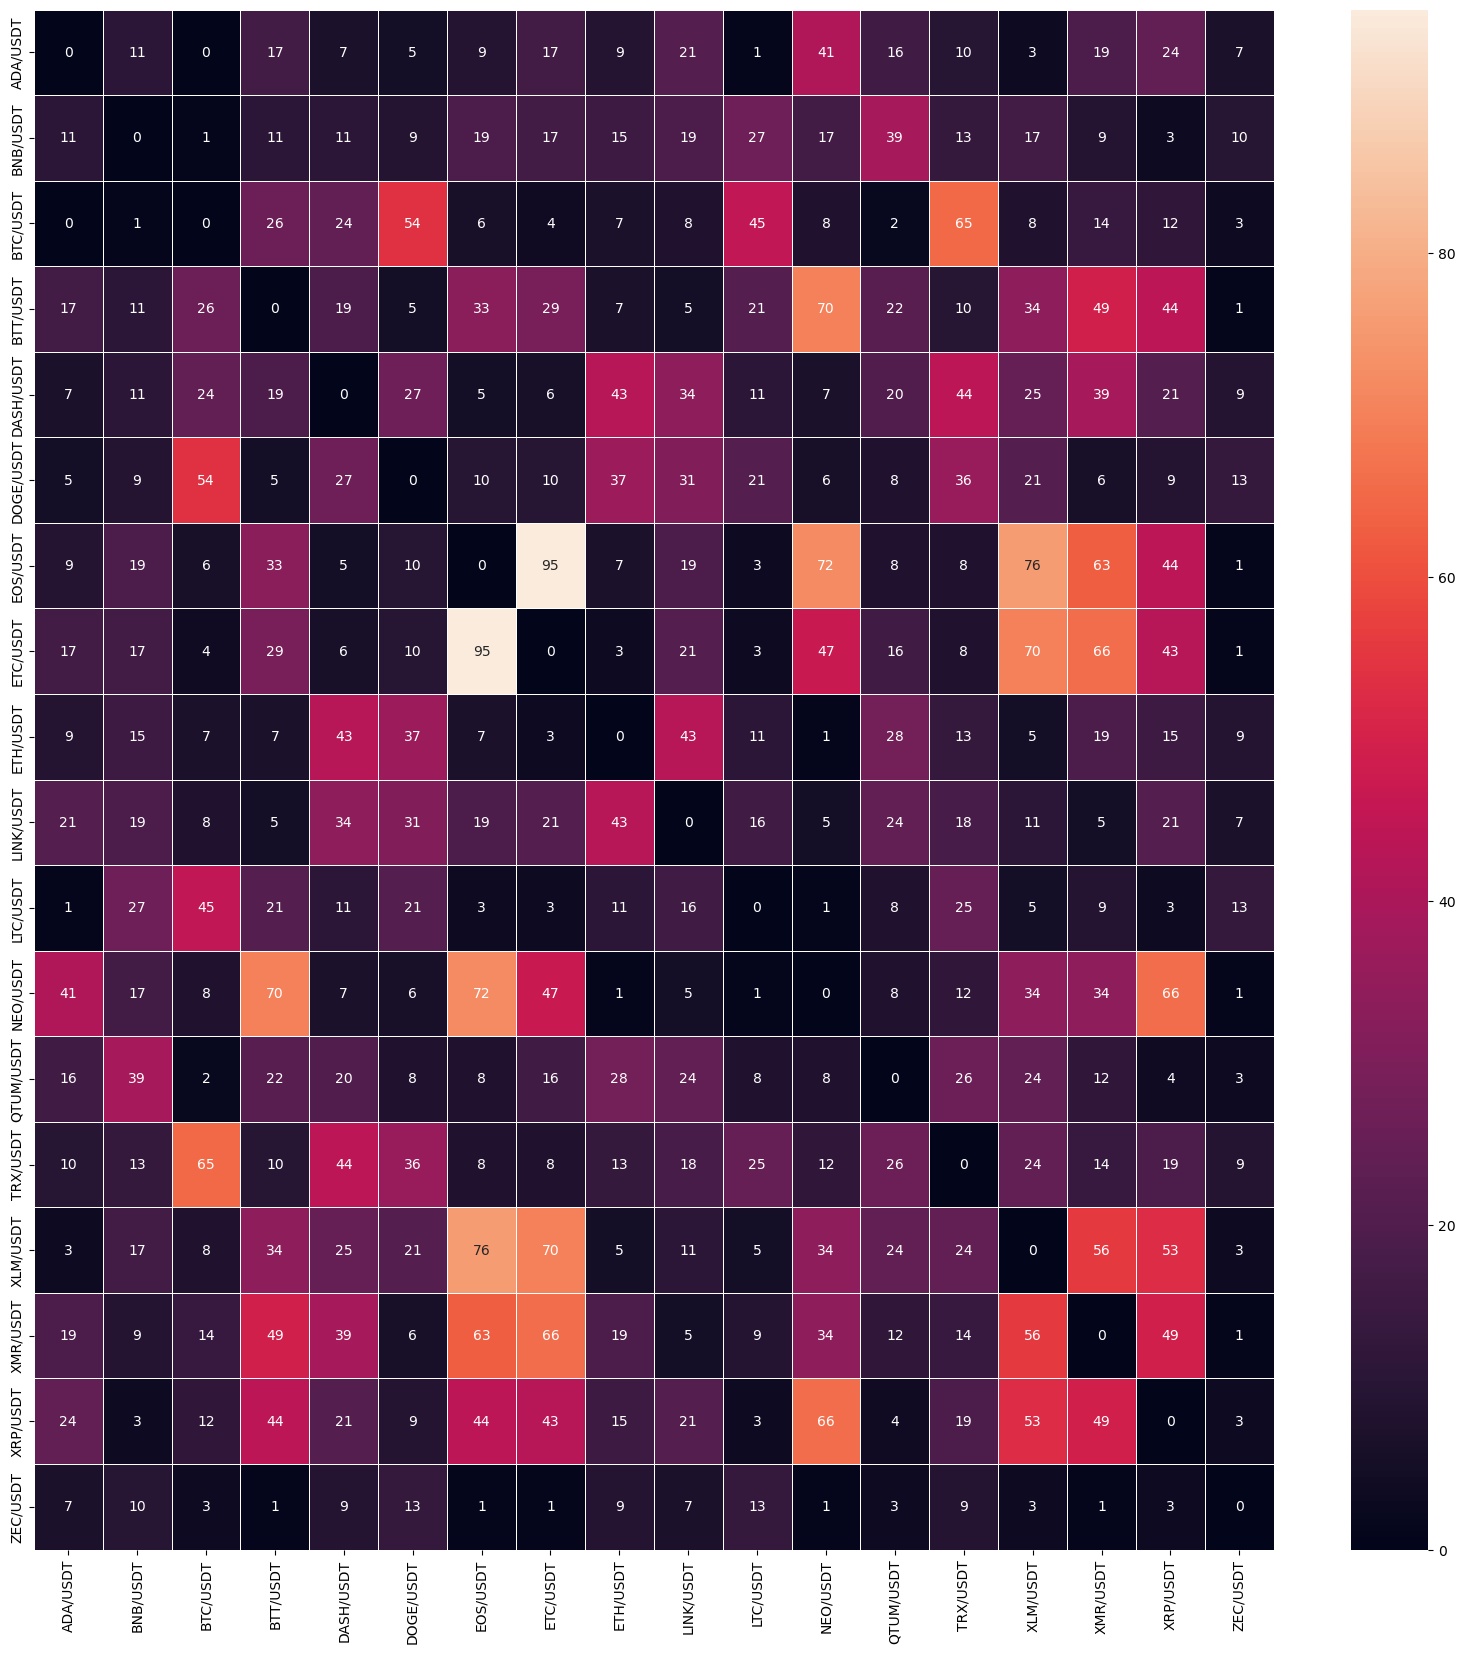

In [48]:
### CROSSOVER SAYISI
fig, ax = plt.subplots(figsize=(20,20)) 
sn.heatmap(num_crossovers_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

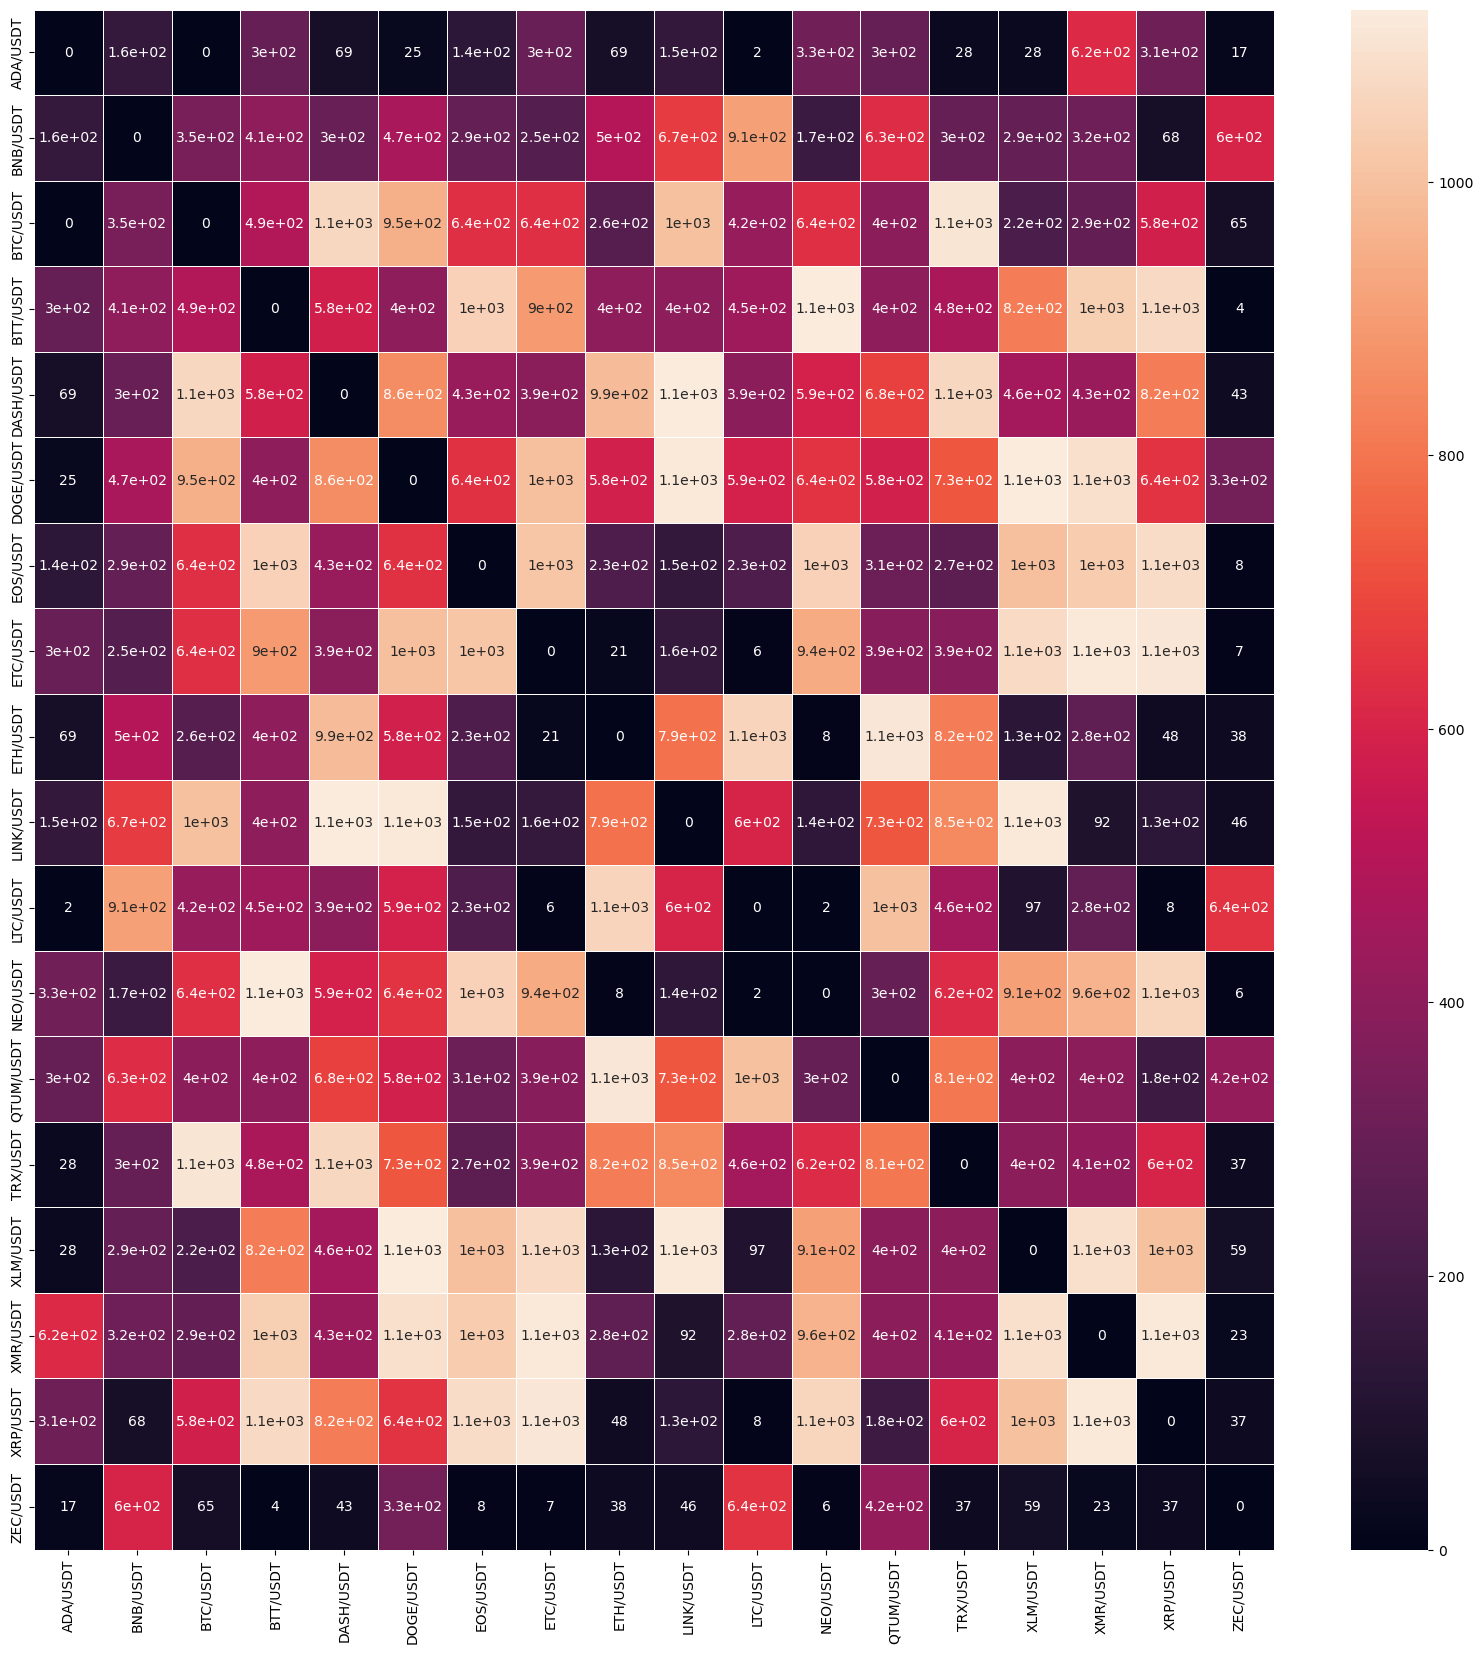

In [49]:
### SON CROSSOVER
fig, ax = plt.subplots(figsize=(20,20)) 
sn.heatmap(last_crossover_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()